## K MEANS CLUSTERING(UNSUPERVISED MACHINE LEARNING)

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### READ THE DATA SET (MALL CUSTOMER)

In [2]:
import pandas as pd
df= pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
df.columns= ['Id','Gender','Age','Income','Spend']
df.head()

,Id,Gender,Age,Income,Spend
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### VISUALIZE INCOME VS SPENDING SCORE

In [6]:
import seaborn as sns

<Axes: xlabel='Income', ylabel='Spend'>

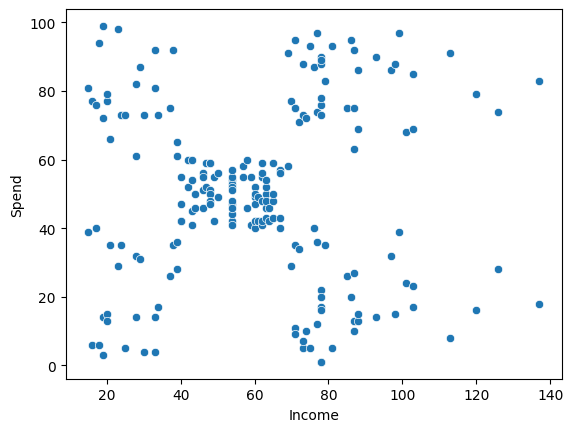

In [7]:
sns.scatterplot(data=df,x='Income',y='Spend')

### GET X FEATURES

In [8]:
X = df[['Income','Spend']]
X.head()

,Income,Spend
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


### CREATING PREPROCESSING PIPELINE

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [10]:
num_pipe= Pipeline(steps=[('impute',SimpleImputer(strategy='median')),
                          ('scaler',StandardScaler())])

In [11]:
X_pre=num_pipe.fit_transform(X)
X_pre

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

### APPLY ELBOW METHOD TO OPTIMUM NUMBER OF CLUSTERS

In [12]:
%pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [13]:
from yellowbrick.cluster.elbow import kelbow_visualizer
from sklearn.cluster import KMeans

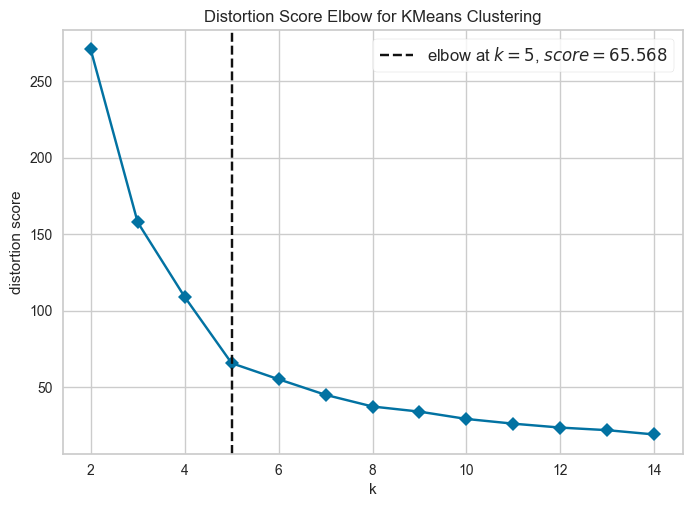

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=14), k=(2, 15), timings=False)

In [14]:
kelbow_visualizer(KMeans(),X_pre,k=(2,15),timings=False)

### CREATE CLUSTERS WITH K= 5

In [15]:
model=KMeans(n_clusters=5)
model.fit(X_pre)

KMeans(n_clusters=5)

In [16]:
lb=model.labels_

In [17]:
X['Labels']=lb

In [18]:
X

,Income,Spend,Labels
0,15,39,3
1,15,81,4
2,16,6,3
3,16,77,4
4,17,40,3
...,...,...,...
195,120,79,2
196,126,28,0
197,126,74,2
198,137,18,0


### CHECK DIFFERENT LABELS

In [19]:
X[X['Labels']==0]

,Income,Spend,Labels
124,70,29,0
128,71,11,0
130,71,9,0
134,73,5,0
136,73,7,0
138,74,10,0
140,75,5,0
144,77,12,0
146,77,36,0
148,78,22,0


In [20]:
X[X['Labels']==1]

,Income,Spend,Labels
43,39,61,1
46,40,55,1
47,40,47,1
48,40,42,1
49,40,42,1
...,...,...,...
121,67,40,1
122,69,58,1
126,71,35,1
132,72,34,1


In [21]:
X[X['Labels']==2]

,Income,Spend,Labels
123,69,91,2
125,70,77,2
127,71,95,2
129,71,75,2
131,71,75,2
133,72,71,2
135,73,88,2
137,73,73,2
139,74,72,2
141,75,93,2


In [22]:
X[X['Labels']==3]

,Income,Spend,Labels
0,15,39,3
2,16,6,3
4,17,40,3
6,18,6,3
8,19,3,3
10,19,14,3
12,20,15,3
14,20,13,3
16,21,35,3
18,23,29,3


In [23]:
X[X['Labels']==4]

,Income,Spend,Labels
1,15,81,4
3,16,77,4
5,17,76,4
7,18,94,4
9,19,72,4
11,19,99,4
13,20,77,4
15,20,79,4
17,21,66,4
19,23,98,4


### visualize the clusters

<Axes: xlabel='Income', ylabel='Spend'>

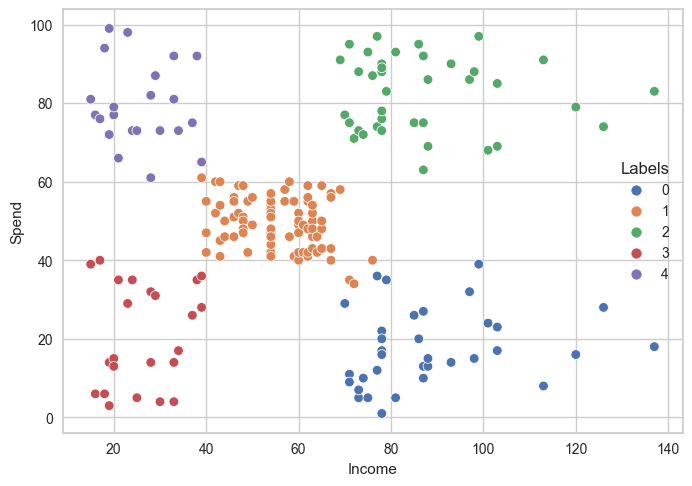

In [24]:
sns.scatterplot(data=X,x='Income',y='Spend',hue='Labels',palette='deep')

### CLUSTERING ON BASIS OF AGE , INCOME AND SPEND

In [25]:
X= df[['Age','Income','Spend']]
X.head()

,Age,Income,Spend
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [26]:
X_pre= num_pipe.fit_transform(X)

In [27]:
X_pre

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

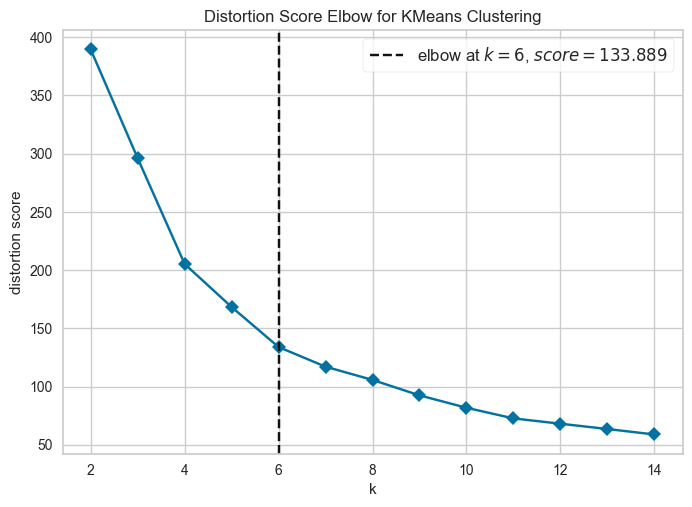

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=14), k=(2, 15), timings=False)

In [28]:
kelbow_visualizer(KMeans(),X_pre,k=(2,15),timings=False)

In [29]:
model2=KMeans(n_clusters=6)
model2.fit(X_pre)

KMeans(n_clusters=6)

In [30]:
lb2= model2.labels_

In [31]:
X['Labels']=lb2

In [32]:
X

,Age,Income,Spend,Labels
0,19,15,39,5
1,21,15,81,5
2,20,16,6,4
3,23,16,77,5
4,31,17,40,4
...,...,...,...,...
195,35,120,79,3
196,45,126,28,2
197,32,126,74,3
198,32,137,18,2


In [33]:
for i in range(6):
    print(f'Labels = {i}\n')
    display(X[X['Labels']==i])
    print('\n==========================================\n')

Labels = 0



,Age,Income,Spend,Labels
43,31,39,61,0
47,27,40,47,0
48,29,40,42,0
49,31,40,42,0
51,33,42,60,0
52,31,43,54,0
58,27,46,51,0
61,19,46,55,0
65,18,48,59,0
68,19,48,59,0




Labels = 1



,Age,Income,Spend,Labels
40,65,38,35,1
46,50,40,55,1
50,49,42,52,1
53,59,43,60,1
54,50,43,45,1
55,47,43,41,1
56,51,44,50,1
57,69,44,46,1
59,53,46,46,1
60,70,46,56,1




Labels = 2



,Age,Income,Spend,Labels
126,43,71,35,2
128,59,71,11,2
130,47,71,9,2
134,20,73,5,2
136,44,73,7,2
138,19,74,10,2
140,57,75,5,2
144,25,77,12,2
146,48,77,36,2
148,34,78,22,2




Labels = 3



,Age,Income,Spend,Labels
123,39,69,91,3
125,31,70,77,3
127,40,71,95,3
129,38,71,75,3
131,39,71,75,3
133,31,72,71,3
135,29,73,88,3
137,32,73,73,3
139,35,74,72,3
141,32,75,93,3




Labels = 4



,Age,Income,Spend,Labels
2,20,16,6,4
4,31,17,40,4
6,35,18,6,4
8,64,19,3,4
10,67,19,14,4
12,58,20,15,4
14,37,20,13,4
16,35,21,35,4
18,52,23,29,4
20,35,24,35,4




Labels = 5



,Age,Income,Spend,Labels
0,19,15,39,5
1,21,15,81,5
3,23,16,77,5
5,22,17,76,5
7,23,18,94,5
9,30,19,72,5
11,35,19,99,5
13,24,20,77,5
15,22,20,79,5
17,20,21,66,5


### VISUALIZE THE 3D DATA (PLOTLY)

In [34]:
%pip install plotly nbformat

Note: you may need to restart the kernel to use updated packages.


In [35]:
import plotly.express as px

In [37]:
fig = px.scatter_3d(data_frame=X,x='Age',y='Income',z='Spend',color='Labels')
fig.show()